In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,1.0,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,2.0,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,2.0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,2.0,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,2.0,m,other,1,45,3.0,2,0,0,73,0


In [0]:
X_train = dataset.iloc[:,1:-1]

In [0]:
y_train = dataset.iloc[:,-1]
test = pd.read_csv('test.csv')
X_test = test.iloc[:,1:]
X = pd.concat((X_train,X_test),axis=0)

In [0]:
del X["age"]

In [31]:
X.head()

,department,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,not_per_age,los_per_age
0,Sales & Marketing,1.0,sourcing,5.0,1,0,49,0.028571,0.228571
1,Operations,2.0,other,5.0,0,0,60,0.033333,0.133333
2,Sales & Marketing,2.0,sourcing,3.0,0,0,50,0.029412,0.205882
3,Sales & Marketing,2.0,other,1.0,0,0,50,0.051282,0.256410
4,Technology,2.0,other,3.0,0,0,73,0.022222,0.044444


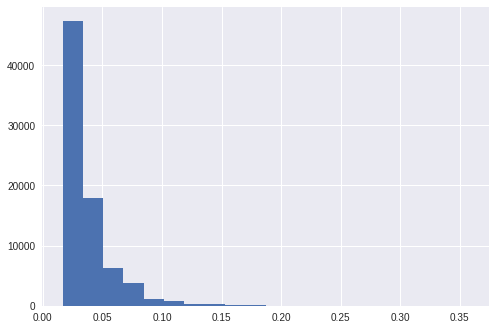

In [33]:
X["not_per_age"].hist(bins=20)

In [0]:
def fun(employee):
  no_of_trainings , age = employee
  not_age = no_of_trainings/age
  return not_age

In [0]:
def fun1(employee):
  length_of_service , age = employee
  los_per_age = length_of_service/age
  return los_per_age

In [0]:
X["los_per_age"] = X[["length_of_service","age"]].apply(fun1,axis=1)

In [0]:
X["not_per_age"] = X[["no_of_trainings","age"]].apply(fun,axis=1)

In [0]:
temp=X.iloc[:,:].values

In [0]:
for i in range(78298):
  if temp[i,2]=="m":
    temp[i,2]=1.0
  else:
    temp[i,2]=2.0
    

In [48]:
temp=pd.DataFrame(data=temp)
temp

,0,1,2,3,4,5,6,7,8,9,10
0,Sales & Marketing,1,2,sourcing,1,35,5,8,1,0,49
1,Operations,2,2,other,1,30,5,4,0,0,60
2,Sales & Marketing,2,2,sourcing,1,34,3,7,0,0,50
3,Sales & Marketing,2,2,other,2,39,1,10,0,0,50
4,Technology,2,2,other,1,45,3,2,0,0,73
5,Analytics,2,2,sourcing,2,31,3,7,0,0,85
6,Operations,2,2,other,1,31,3,5,0,0,59
7,Operations,1,2,sourcing,1,33,3,6,0,0,63
8,Analytics,2,2,other,1,28,4,5,0,0,83
9,Sales & Marketing,1,2,sourcing,1,32,5,5,1,0,54


In [40]:
len(X["gender"])


78298

In [0]:
len(X)

In [181]:
dataset["recruitment_channel"].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [0]:
X1 = X.copy()

In [183]:
X["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 9 columns):
department              78298 non-null object
education               78298 non-null float64
recruitment_channel     78298 non-null object
previous_year_rating    78298 non-null float64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
not_per_age             78298 non-null float64
los_per_age             78298 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 8.5+ MB


In [185]:
X["education"].unique()

array([ 1.,  2., nan,  3.])

In [0]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imputer = imputer.fit(X.iloc[:, [1]])
X.iloc[:, [1]] = imputer.transform(X.iloc[:, [1]])

In [0]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X.iloc[:, [3]])
X.iloc[:, [3]] = imputer.transform(X.iloc[:, [3]])

In [42]:
X.head()

,department,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,not_per_age,los_per_age
0,7,1.0,2,5.0,1,0,49,0.028571,0.228571
1,4,2.0,0,5.0,0,0,60,0.033333,0.133333
2,7,2.0,2,3.0,0,0,50,0.029412,0.205882
3,7,2.0,0,1.0,0,0,50,0.051282,0.256410
4,8,2.0,0,3.0,0,0,73,0.022222,0.044444


In [0]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 0] = labelencoder_X.fit_transform(X.iloc[:, 0])


In [0]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X2 = LabelEncoder()
X.iloc[:, 2] = labelencoder_X2.fit_transform(X.iloc[:, 2])

In [0]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X3 = LabelEncoder()
X.iloc[:, 3] = labelencoder_X3.fit_transform(X.iloc[:, 3])

In [0]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
X=X[:,1:]

In [0]:
from pandas import DataFrame

In [0]:
Xd = DataFrame(data=X)

In [49]:
Xd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,1.0,0.0,49.0,0.028571,0.228571
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,60.0,0.033333,0.133333
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,50.0,0.029412,0.205882
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,0.051282,0.256410
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,73.0,0.022222,0.044444


In [0]:
onehotencoder = OneHotEncoder(categorical_features = [8])
X = onehotencoder.fit_transform(X).toarray()
X=X[:,1:]

In [0]:
onehotencoder = OneHotEncoder(categorical_features = [10])
X = onehotencoder.fit_transform(X).toarray()
X=X[:,1:]

In [0]:
X_train1 = X[0:54808,:]
X_test1 = X[54808:,:]

In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [0]:
from xgboost import XGBClassifier

In [0]:
classifier = XGBClassifier()

In [53]:
classifier.fit(X_train1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test1)

In [0]:
sample = pd.read_csv("sample_submission.csv")

In [56]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [0]:
sample["is_promoted"] = y_pred

In [0]:
sample.to_csv("submission4.csv",index=False)

